### Model Training



In [1]:
#importing necessary libraries
!pip install numpy==1.21.4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import libraries for modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
#Import the CSV Data as Pandas DataFrame

df = pd.read_csv('stud.csv.csv')  

In [3]:
#show top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables


In [4]:
X = df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print('***\n', end=" ")
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print('***\n', end=" ")
print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print('***\n', end=" ")
print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print('***\n', end=" ")
print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
***
 Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
***
 Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
***
 Categories in 'lunch' variable:      ['standard' 'free/reduced']
***
 Categories in 'test preparation course' variable:      ['none' 'completed']


In [6]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [8]:
X = preprocessor.fit_transform(X)


In [9]:
X.shape

(1000, 19)

In [10]:
#train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state= 42)


In [11]:
X_train.shape, X_test.shape


((700, 19), (300, 19))

In [12]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
!pip install threadpoolctl==3.1.0
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2483
- Mean Absolute Error: 4.1985
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5576
- Mean Absolute Error: 4.4183
- R2 Score: 0.8759


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6782
- Mean Absolute Error: 4.5034
- R2 Score: 0.8538
-----------------------

In [14]:
#results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.875863
7,CatBoosting Regressor,0.852108
5,Random Forest Regressor,0.846932
6,XGBRegressor,0.842395
8,AdaBoost Regressor,0.831952
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772166
4,Decision Tree,0.730759


In [15]:
import sklearn
print(sklearn.show_versions())



System:
    python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\divya\anaconda3\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.2.1
          pip: 21.2.4
   setuptools: 58.0.4
        numpy: 1.21.4
        scipy: 1.7.1
       Cython: 0.29.24
       pandas: 1.3.4
   matplotlib: 3.4.3
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\divya\anaconda3\Lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
        version: 0.3.17
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: blas
   internal_api: mkl
         prefix: mkl_rt
       filepath: C:\Users\divya\anaconda3\Library\bin\mkl_rt.1.dll
        version: 2021.4-Product
threading_layer: intel
    num_threads: 4

       user_api: open

In [16]:
#linearregression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.59


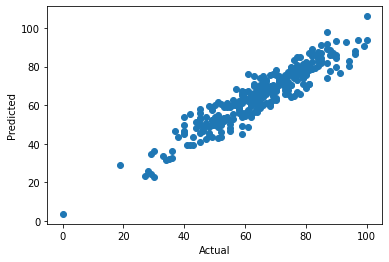

In [17]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

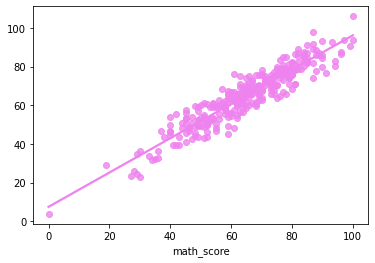

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='violet');


In [19]:
#Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
521,91,76.511652,14.488348
737,53,58.898180,-5.898180
740,80,76.938478,3.061522
660,74,76.965881,-2.965881
411,84,87.633152,-3.633152
...,...,...,...
468,77,72.854766,4.145234
935,70,62.606548,7.393452
428,65,58.650347,6.349653
7,40,44.841375,-4.841375
